<a href="https://colab.research.google.com/github/sajidkhan-ai/logistic-regression-ml/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AWFERA : Machine Learning Course**


# **Topic : Logistic Regression **

#**Step 1 : Import Libraries**
#  Before starting any machine learning task, we first import the required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

# **Step 2 : Load the Dataset**
# Now we’ll load the dataset using **Pandas** and take the first step toward understanding the structure and contents of the data.

In [2]:
#Load data
df = pd.read_csv('/content/titanic_dataset.csv')

# **Step 3 : Understanding the Data**
# Before jumping into cleaning or building a model, it’s important to understand the structure, size, and basic info about the dataset.

In [3]:
# Display the first 5 rows of the dataset to get an initial look at the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display the last rows of a dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Returns the number of rows and columns in the dataset (rows, columns)
df.shape

(891, 12)

In [6]:
# Displays a concise summary of the dataset including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Shows basic statistical details like mean, std, min, and max for each numeric column
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Lists all column names in the dataset to understand the available features
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **Step 4 : Data Prep-processing**

# **1. Data Cleaning**

# **Steps in Data Cleaning**

# **i. Handling Missing Values**



In [9]:
df.isnull().sum()/len(df)*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [10]:
# Dropping the Cabin column as it contain above 70% missisng data.
df.drop('Cabin', axis=1, inplace=True)

In [11]:
#Checking the column that as the Cabin column drop or not.
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [12]:
#Droping missing values from Embarked column as it contain 2 missing values.
df.dropna(subset=['Embarked'], inplace=True)

In [13]:
# Create a new column to indicate missing values
df['Age_missing'] = df['Age'].isnull().astype(int)

# Fill missing Age values with median (or mean)
df['Age'].fillna(df['Age'].median(), inplace=True)

In [14]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
df.shape

(889, 12)

In [16]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_missing
298,299,1,1,"Saalfeld, Mr. Adolphe",male,28.0,0,0,19988,30.5000,S,1
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,S,0
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,S,0
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,28.0,0,0,343095,8.0500,S,1
832,833,0,3,"Saad, Mr. Amin",male,28.0,0,0,2671,7.2292,C,1


# **ii. Handling Duplicates**

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.drop_duplicates(inplace=True)

# **iii. Fixing Data Types**

In [19]:
df['Age'] = df['Age'].astype('int64')
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,int64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


# **iv. Removing Irrelevant Data**

In [20]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_missing
0,0,3,male,22,1,0,7.2500,S,0
1,1,1,female,38,1,0,71.2833,C,0
2,1,3,female,26,0,0,7.9250,S,0
3,1,1,female,35,1,0,53.1000,S,0
4,0,3,male,35,0,0,8.0500,S,0


# **iv. Check Data distribution for numeric column**

# Before handling outliers we check the data distribution if it is skewed then we apply IQR and if it is normally distributed then we apply z-score.

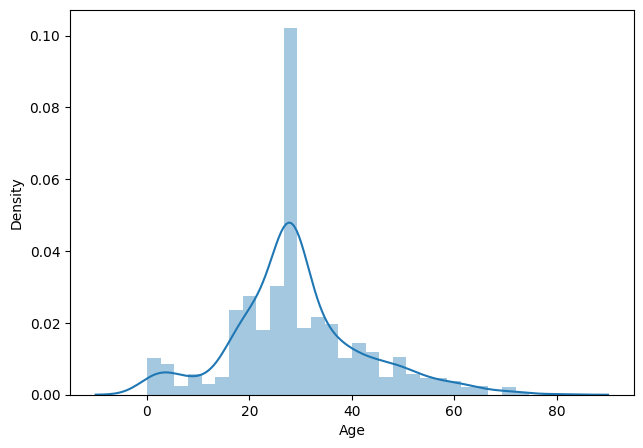

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.show()

# **v. Handling Outliers**
# Outliers Detection using z-score for Age.

In [22]:
from scipy.stats import zscore

z_score = np.abs(zscore(df['Age']))
outliers = (z_score > 3)

print(df[outliers])

     Survived  Pclass   Sex  Age  SibSp  Parch     Fare Embarked  Age_missing
96          0       1  male   71      0      0  34.6542        C            0
116         0       3  male   70      0      0   7.7500        Q            0
493         0       1  male   71      0      0  49.5042        C            0
630         1       1  male   80      0      0  30.0000        S            0
672         0       2  male   70      0      0  10.5000        S            0
745         0       1  male   70      1      1  71.0000        S            0
851         0       3  male   74      0      0   7.7750        S            0


# Removing Outliers

# Trimming

In [23]:
df_no_outliers = df[~outliers]
df_no_outliers.shape

(882, 9)

In [24]:
df_no_outliers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_missing
0,0,3,male,22,1,0,7.2500,S,0
1,1,1,female,38,1,0,71.2833,C,0
2,1,3,female,26,0,0,7.9250,S,0
3,1,1,female,35,1,0,53.1000,S,0
4,0,3,male,35,0,0,8.0500,S,0


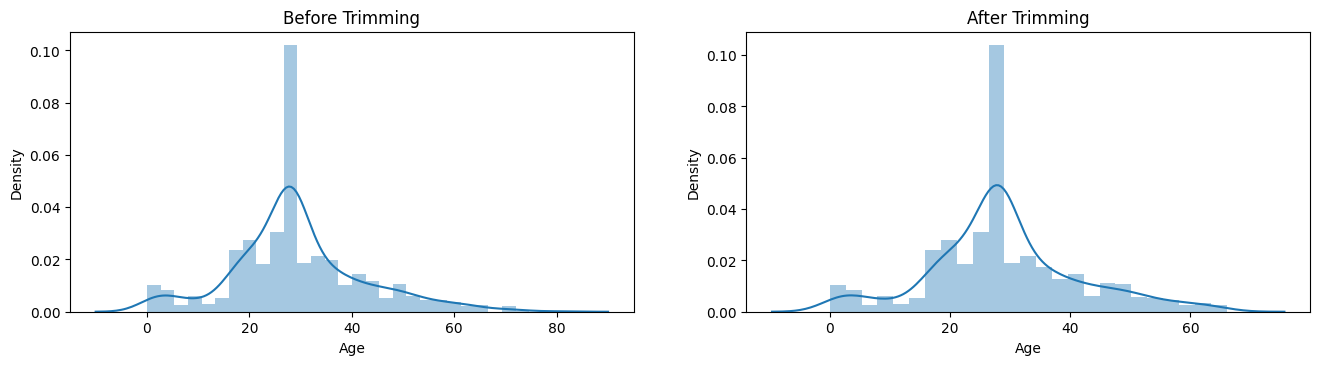

In [25]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title('Before Trimming')
sns.distplot(df['Age'])

plt.subplot(2,2,2)
plt.title('After Trimming')
sns.distplot(df_no_outliers['Age'])

plt.show()

# **Step 5 : Selecting Target Variable**

In [26]:
x = df_no_outliers.drop('Survived', axis=1)
y = df_no_outliers['Survived']

# **Step 6 : Splitting Data into Tranining and Testing set**

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Step 7 : Data Transformation**

# **Handling Categorical Variables**

In [28]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# 1. Initialize encoder with sparse=False to get a dense array (not sparse matrix)
ohe = OneHotEncoder(sparse_output=False, dtype=np.int32)

# 2. Fit only on the categorical columns
ohe.fit(x_train[['Sex', 'Embarked']])

x_train_encoded = ohe.transform(x_train[['Sex', 'Embarked']])
x_test_encoded = ohe.transform(x_test[['Sex', 'Embarked']])

# Get feature names from the encoder
ohe_columns = ohe.get_feature_names_out(['Sex', 'Embarked'])

# Convert to DataFrame with those column names
x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=ohe_columns, index=x_train.index)
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=ohe_columns, index=x_test.index)

# Drop the original 'fuel' and 'owner' columns from x_train
x_train_final = pd.concat([x_train.drop(['Sex', 'Embarked'], axis=1), x_train_encoded_df], axis=1)

# Same for x_test
x_test_final = pd.concat([x_test.drop(['Sex', 'Embarked'], axis=1), x_test_encoded_df], axis=1)

In [29]:
x_train_final.head()

,Pclass,Age,SibSp,Parch,Fare,Age_missing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
594,2,37,1,0,26.0000,0,0,1,0,0,1
82,3,28,0,0,7.7875,1,1,0,0,1,0
655,2,24,2,0,73.5000,0,0,1,0,0,1
364,3,28,1,0,15.5000,1,0,1,0,1,0
553,3,22,0,0,7.2250,0,0,1,1,0,0


# **Step 8 : Feature Scaling**

# Standardization

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train_final[['Age', 'Fare']])

x_train_final[['Age', 'Fare']] = scaler.transform(x_train_final[['Age', 'Fare']])
x_test_final[['Age', 'Fare']] = scaler.transform(x_test_final[['Age', 'Fare']])

In [31]:
x_train_final.head()

,Pclass,Age,SibSp,Parch,Fare,Age_missing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
594,2,0.662376,1,0,-0.109926,0,0,1,0,0,1
82,3,-0.065125,0,0,-0.483575,1,1,0,0,1,0
655,2,-0.388459,2,0,0.864588,0,0,1,0,0,1
364,3,-0.065125,1,0,-0.325345,1,0,1,0,1,0
553,3,-0.550126,0,0,-0.495116,0,0,1,1,0,0


In [32]:
x_test_final.head()

,Pclass,Age,SibSp,Parch,Fare,Age_missing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
44,3,-0.792626,0,0,-0.481694,0,1,0,0,1,0
337,1,0.985709,0,0,2.116069,0,1,0,1,0,0
87,3,-0.065125,0,0,-0.478190,1,0,1,0,0,1
456,1,2.925712,0,0,-0.098642,0,0,1,0,0,1
467,1,2.198211,0,0,-0.098642,0,0,1,0,0,1


# **Step 9 : Feature Engineering**

# **Feature Construction**
# The process of creating new features from the existing features in your dataset.

In [33]:
x_train_final['Family_Size'] = x_train_final['SibSp'] + x_train_final['Parch'] + 1
x_test_final['Family_Size'] = x_test_final['SibSp'] + x_test_final['Parch'] + 1

In [34]:
x_train_final.head()

,Pclass,Age,SibSp,Parch,Fare,Age_missing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_Size
594,2,0.662376,1,0,-0.109926,0,0,1,0,0,1,2
82,3,-0.065125,0,0,-0.483575,1,1,0,0,1,0,1
655,2,-0.388459,2,0,0.864588,0,0,1,0,0,1,3
364,3,-0.065125,1,0,-0.325345,1,0,1,0,1,0,2
553,3,-0.550126,0,0,-0.495116,0,0,1,1,0,0,1


In [35]:
x_test_final.head()

,Pclass,Age,SibSp,Parch,Fare,Age_missing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_Size
44,3,-0.792626,0,0,-0.481694,0,1,0,0,1,0,1
337,1,0.985709,0,0,2.116069,0,1,0,1,0,0,1
87,3,-0.065125,0,0,-0.478190,1,0,1,0,0,1,1
456,1,2.925712,0,0,-0.098642,0,0,1,0,0,1,1
467,1,2.198211,0,0,-0.098642,0,0,1,0,0,1,1


# **Droping the existing features from dataset**

In [36]:
x_train_final.drop(['SibSp', 'Parch'], axis=1, inplace=True)
x_test_final.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [37]:
x_train_final.head()

,Pclass,Age,Fare,Age_missing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_Size
594,2,0.662376,-0.109926,0,0,1,0,0,1,2
82,3,-0.065125,-0.483575,1,1,0,0,1,0,1
655,2,-0.388459,0.864588,0,0,1,0,0,1,3
364,3,-0.065125,-0.325345,1,0,1,0,1,0,2
553,3,-0.550126,-0.495116,0,0,1,1,0,0,1


In [38]:
x_test_final.head()

,Pclass,Age,Fare,Age_missing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_Size
44,3,-0.792626,-0.481694,0,1,0,0,1,0,1
337,1,0.985709,2.116069,0,1,0,1,0,0,1
87,3,-0.065125,-0.478190,1,0,1,0,0,1,1
456,1,2.925712,-0.098642,0,0,1,0,0,1,1
467,1,2.198211,-0.098642,0,0,1,0,0,1,1


# **Step 10: Training a Model using Logistic Regression**

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_final, y_train)

LogisticRegression()

# **Step 11: Taking Prediction from Model**

In [40]:
y_pred = model.predict(x_test_final)

# **Model Evaluation**

In [41]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8135593220338984
